# Tasks

#### In this project i try to solve unsupervised machine learning problem on  dataset where the company is UK-based and registered non-store online retail. The most customer of this company are wholesalers.

1. Problem Definition
2. Data
3. Features
4. Modelling
5. Experiment/Evaluate

## 1. Problem Definition
> Set the class and the segment label of each customer and grouping into several segments which aims to how the company will treat customers in the future.

## 2. Data
> The original data set came from UCI Machine Learning Repository http://archive.ics.uci.edu/ml/datasets/online+retail
and there is also available on kaggle https://www.kaggle.com/carrie1/ecommerce-data

## 4. Features

>- InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
- StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
- Description: Product (item) name. Nominal.
- Quantity: The quantities of each product (item) per transaction. Numeric.
- InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
- UnitPrice: Unit price. Numeric, Product price per unit in sterling.
- CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
- Country: Country name. Nominal, the name of the country where each customer resides.

## 5. Modelling
> Since this dataset is a Unsupervised Learning Dataset therefore i should cluster each customerID to process for further. in this case i labeling each customer id using RFM(Recency, Frequency, Monetary) method and find a way how to treat customer based on their segment.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
%matplotlib inline
sns.set(style='whitegrid', palette='pastel')

In [2]:
df=pd.read_csv('Ecommerce.csv', encoding= 'unicode_escape')

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Unnamed: 8
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom,NaN
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom,NaN
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN


In [4]:
df.drop('Unnamed: 8', axis=1, inplace=True)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
df.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900,4070,4223,NaN,305,NaN,NaN,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,3-Dec-17,NaN,NaN,United Kingdom
freq,1114,2313,2369,NaN,5331,NaN,NaN,495478
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN
50%,NaN,NaN,NaN,3.000000,NaN,2.080000,15152.000000,NaN
75%,NaN,NaN,NaN,10.000000,NaN,4.130000,16791.000000,NaN


- There are some missing values at 'CustomerID' column and 'Description' column
- Something strange at 'Quantity' minimum values and at 'UnitPrice' minimum values, why is that minus values?
- Maybe i should change InvoiceDate dtype

## Check Missing Value

In [7]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
df=df.dropna(subset=['CustomerID'])
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [9]:
df[df['Quantity']<0].head(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,29-Nov-16,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,29-Nov-16,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,29-Nov-16,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,29-Nov-16,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,29-Nov-16,0.29,17548.0,United Kingdom
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,29-Nov-16,0.29,17548.0,United Kingdom
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,29-Nov-16,3.45,17548.0,United Kingdom
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,29-Nov-16,1.65,17548.0,United Kingdom
241,C536391,22553,PLASTERS IN TIN SKULLS,-24,29-Nov-16,1.65,17548.0,United Kingdom
939,C536506,22960,JAM MAKING SET WITH JARS,-6,29-Nov-16,4.25,17897.0,United Kingdom


In [10]:
# i assume thats negative value in quantity as canceled order, so i drop them
df=df.drop(df[df.Quantity<0].index)
df['Quantity'].describe()

count    397924.000000
mean         13.021823
std         180.420210
min           1.000000
25%           2.000000
50%           6.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64

In [11]:
df[df['UnitPrice']<=0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,3-Dec-16,0.0,12647.0,Germany
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,14-Dec-16,0.0,16560.0,United Kingdom
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,19-Dec-16,0.0,14911.0,EIRE
47068,540372,22090,PAPER BUNTING RETROSPOT,24,4-Jan-17,0.0,13081.0,United Kingdom
47070,540372,22553,PLASTERS IN TIN SKULLS,24,4-Jan-17,0.0,13081.0,United Kingdom
56674,541109,22168,ORGANISER WOOD ANTIQUE WHITE,1,11-Jan-17,0.0,15107.0,United Kingdom
86789,543599,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,16,8-Feb-17,0.0,17560.0,United Kingdom
130188,547417,22062,CERAMIC BOWL WITH LOVE HEART DESIGN,36,21-Mar-17,0.0,13239.0,United Kingdom
139453,548318,22055,MINI CAKE STAND HANGING STRAWBERY,5,28-Mar-17,0.0,13113.0,United Kingdom
145208,548871,22162,HEART GARLAND RUSTIC PADDED,2,2-Apr-17,0.0,14410.0,United Kingdom


In [12]:
# lets drop unitprice too
df=df.drop(df[df.UnitPrice<=0].index)
df['UnitPrice'].describe()

count    397884.000000
mean          3.116488
std          22.097877
min           0.001000
25%           1.250000
50%           1.950000
75%           3.750000
max        8142.750000
Name: UnitPrice, dtype: float64

In [13]:
# change 'InvoiceDate' column type
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB


In [14]:
# show how many CustomerID amount
country_id=df[['Country', 'CustomerID']].drop_duplicates()
country_id.groupby(['Country'])['CustomerID'].count().reset_index().sort_values('CustomerID', ascending=False)

,Country,CustomerID
35,United Kingdom,3920
14,Germany,94
13,France,87
30,Spain,30
3,Belgium,25
32,Switzerland,21
26,Portugal,19
18,Italy,14
12,Finland,12
1,Austria,11


### RFM
>* Recency = Latest Transaction Date - Last Invoice Data
* Frequency = count of invoice no. of transaction
* Monetary = Sum of total spend for each customer id

In [15]:
# Make new column named 'spend', which is contains the total amount
df['spend']=df['Quantity']*df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,spend
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,17850.0,United Kingdom,20.34


In [16]:
# separate into 2 dataframe because data from UK so dominating (df_uk and df_other)
df_uk=df[df.Country=='United Kingdom']
df_other=df[df.Country!='United Kingdom']

In [17]:
# check data shape
print(df_uk.shape, 
      df_other.shape), 

print(df[df['Country']=='United Kingdom'].shape,
      df[df['Country']!='United Kingdom'].shape)

(354321, 9) (43563, 9)
(354321, 9) (43563, 9)


# United Kingdom data

In [18]:
# check the last transaction
df_uk['InvoiceDate'].sort_values(ascending=False).head()

541893   2017-12-07
541260   2017-12-07
541249   2017-12-07
541250   2017-12-07
541251   2017-12-07
Name: InvoiceDate, dtype: datetime64[ns]

In [19]:
import datetime as dt

In [20]:
# create rfm_uk table
latest_date_uk=dt.datetime(2017,12,8)
rfm_uk=df_uk.groupby(df_uk['CustomerID']).agg({'InvoiceDate': lambda x:(latest_date_uk-x.max()).days, # Recency
                                            'InvoiceNo': lambda x:len(x), # Frequency
                                            'spend': lambda x:x.sum()}).reset_index() # Monetary
rfm_uk.head()

,CustomerID,InvoiceDate,InvoiceNo,spend
0,12346.0,326,1,77183.60
1,12747.0,3,103,4196.01
2,12748.0,1,4595,33719.73
3,12749.0,4,199,4090.88
4,12820.0,4,59,942.34


In [21]:
# Check the difference between count and len
# print(df['InvoiceNo'].count(),
# len(df['InvoiceNo']))

In [22]:
# change rfm_uk column name
rfm_uk.rename(columns={'InvoiceDate': 'Recency',
                'InvoiceNo': 'Frequency',
                'spend': 'Monetary'}, inplace=True)
rfm_uk.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,77183.60
1,12747.0,3,103,4196.01
2,12748.0,1,4595,33719.73
3,12749.0,4,199,4090.88
4,12820.0,4,59,942.34


<function matplotlib.pyplot.show(*args, **kw)>

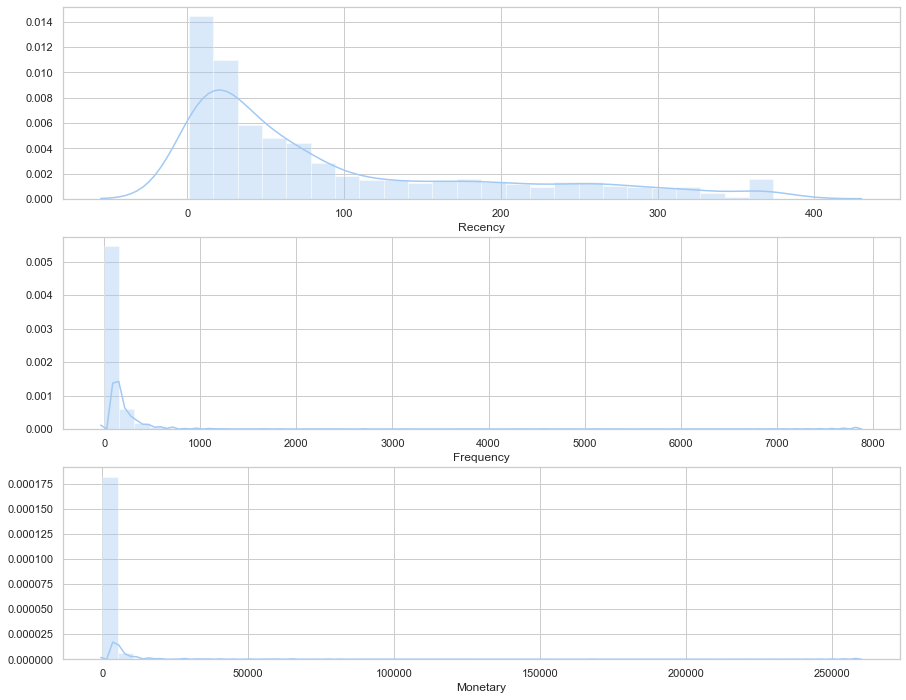

In [53]:
# check distribution from each RFM
fig, ax=plt.subplots(3, figsize=(15,12))
sns.distplot(rfm_uk['Recency'], ax=ax[0])
sns.distplot(rfm_uk['Frequency'], ax=ax[1])
sns.distplot(rfm_uk['Monetary'], ax=ax[2])
plt.savefig('RFM_distribution.png', bbox_inches='tight')
plt.show

In [24]:
# divide the category using quantile into 5 category
quantiles_uk=rfm_uk.quantile(q=[0.20, 0.40, 0.60, 0.80])
quantiles_uk=quantiles_uk.to_dict()
quantiles_uk

{'CustomerID': {0.2: 13931.8, 0.4: 15047.6, 0.6: 16110.8, 0.8: 17193.2},
 'Recency': {0.2: 13.0, 0.4: 33.0, 0.6: 72.0, 0.8: 179.0},
 'Frequency': {0.2: 13.0, 0.4: 29.0, 0.6: 58.0, 0.8: 120.0},
 'Monetary': {0.2: 242.20400000000006,
  0.4: 465.62799999999993,
  0.6: 897.676,
  0.8: 1957.8780000000008}}

In [25]:
# RFM Function (1 is the best score and 5 is the worst)

def r_score(x,p,d):
    if x<= d[p][0.20]:
        return 1
    elif x<= d[p][0.40]:
        return 2
    elif x<= d[p][0.60]:
        return 3
    elif x<=d[p][0.80]:
        return 4
    else:
        return 5

def fm_score(x,p,d):
    if x<= d[p][0.20]:
        return 5
    elif x<= d[p][0.40]:
        return 4
    elif x<= d[p][0.60]:
        return 3
    elif x<=d[p][0.80]:
        return 2
    else:
        return 1

In [26]:
# creat new table that contains R, F, M scores 
rfm_uk['R']=rfm_uk['Recency'].apply(r_score, args=('Recency',quantiles_uk,))
rfm_uk['F']=rfm_uk['Frequency'].apply(fm_score, args=('Frequency',quantiles_uk,))
rfm_uk['M']=rfm_uk['Monetary'].apply(fm_score, args=('Monetary',quantiles_uk,))
rfm_uk.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M
0,12346.0,326,1,77183.60,5,5,1
1,12747.0,3,103,4196.01,1,2,1
2,12748.0,1,4595,33719.73,1,1,1
3,12749.0,4,199,4090.88,1,1,1
4,12820.0,4,59,942.34,1,2,2


In [27]:
# create new table that contains the total of R+F+M scores
rfm_uk['Scores']=(rfm_uk.R.map(int) + rfm_uk.F.map(int) + rfm_uk.M.map(int))
rfm_uk.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,Scores
0,12346.0,326,1,77183.60,5,5,1,11
1,12747.0,3,103,4196.01,1,2,1,4
2,12748.0,1,4595,33719.73,1,1,1,3
3,12749.0,4,199,4090.88,1,1,1,3
4,12820.0,4,59,942.34,1,2,2,5


In [28]:
# label each customerID based on total RFM Scores using pandas.qcut
label=['Diamond', 'Platinum', 'Gold', 'Silver', 'Bronze']
level_uk=pd.qcut(rfm_uk['Scores'], q=5, labels=label)
rfm_uk['Class']=level_uk.values
rfm_uk.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,Scores,Class
0,12346.0,326,1,77183.60,5,5,1,11,Silver
1,12747.0,3,103,4196.01,1,2,1,4,Diamond
2,12748.0,1,4595,33719.73,1,1,1,3,Diamond
3,12749.0,4,199,4090.88,1,1,1,3,Diamond
4,12820.0,4,59,942.34,1,2,2,5,Diamond


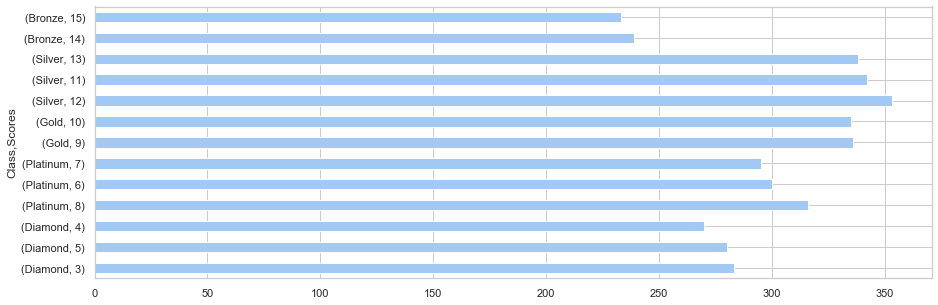

In [29]:
# Check class splitting
rfm_uk.groupby('Class').Scores.value_counts().plot(kind='barh', figsize=(15,5))
plt.savefig('class_score_distribution.png', bbox_inches='tight')
plt.show()

In [30]:
rfm_uk[rfm_uk['Scores']==3]

,CustomerID,Recency,Frequency,Monetary,R,F,M,Scores,Class
2,12748.0,1,4595,33719.73,1,1,1,3,Diamond
3,12749.0,4,199,4090.88,1,1,1,3,Diamond
21,12839.0,3,314,5591.42,1,1,1,3,Diamond
23,12841.0,5,420,4022.35,1,1,1,3,Diamond
35,12856.0,8,314,2179.93,1,1,1,3,Diamond
74,12921.0,10,720,16587.09,1,1,1,3,Diamond
84,12935.0,3,129,2160.70,1,1,1,3,Diamond
100,12955.0,2,180,4757.16,1,1,1,3,Diamond
102,12957.0,10,238,4017.54,1,1,1,3,Diamond
110,12971.0,4,305,11189.91,1,1,1,3,Diamond


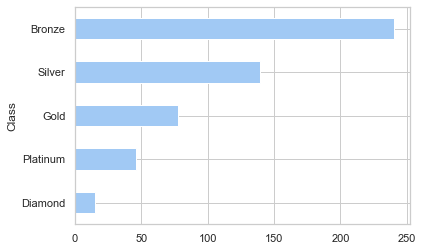

In [31]:
rfm_uk.groupby('Class').Recency.mean().plot(kind='barh')

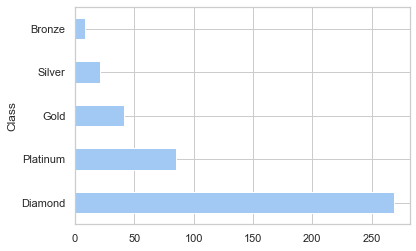

In [32]:
rfm_uk.groupby('Class').Frequency.mean().plot(kind='barh')

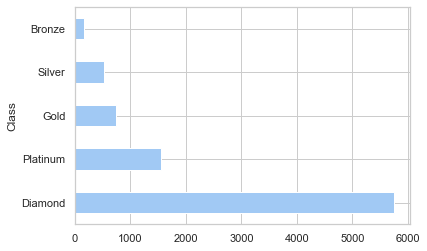

In [33]:
rfm_uk.groupby('Class').Monetary.mean().plot(kind='barh')

https://www.putler.com/rfm-analysis/
>
* Champions 	4-5, 	4-5
* Loyal Customers 	2-5, 	3-5
* Potential Loyalist 	3-5, 	1-3
* Recent Customers 	4-5, 	0-1
* Promising 	3-4, 	0-1
* Customers Needing Attention 	2-3, 	2-3
* About To Sleep 	2-3, 	0-2
* At Risk 	0-2, 	2-5
* Can’t Lose Them 	0-1, 	4-5
* Hibernating 	1-2, 	1-2
* Lost 	0-2, 	0-2

In [34]:
# create new table that contains the total of R+F+M scores
rfm_uk['RFMScores']=(rfm_uk.R.map(str) + rfm_uk.F.map(str) + rfm_uk.M.map(str))
rfm_uk.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,Scores,Class,RFMScores
0,12346.0,326,1,77183.60,5,5,1,11,Silver,551
1,12747.0,3,103,4196.01,1,2,1,4,Diamond,121
2,12748.0,1,4595,33719.73,1,1,1,3,Diamond,111
3,12749.0,4,199,4090.88,1,1,1,3,Diamond,111
4,12820.0,4,59,942.34,1,2,2,5,Diamond,122


In [35]:
segment={r'[4-5][3-4-5][3-4-5]': 'Hibernating',
    r'[4-5][1-2-3][1-2]': 'Can\'t Lose',
    r'[3-4][4-5][4-5]': 'About to Sleep',
    r'[3-4][2-3-4][2-3-4]': 'Need Attention',
    r'[2-3-4][1-2-3][1-2-3]': 'Loyal Customers',
    r'[1-2-3][1-2-3][4-5]': 'Low Spending loyal customers', 
    r'[2-3-4][4-5][4-5]': 'Promising',
    r'1[4-5][4-5]': 'New Customers',
    r'[1-2-3][1-2-3][3-4-5]': 'Potential Loyalists',
    r'[1-2][1-2][1-2]': 'Best Customers',
    r'[4-5][1-2-3-4-5][3-4-5]': 'Churned Customers',
    r'[1-2][3-4-5][1-2]': 'High-spending New Customers',
    r'[3-4-5][4-5][1-2]': 'Rare High Spenders',
    r'[1-2-3][4-5]3': 'Loyal Middle Class Spenders'}

In [36]:
rfm_uk['Segment']=rfm_uk['RFMScores'].replace(segment, regex=True)
rfm_uk['Segment'].value_counts()

Hibernating                     1148
Loyal Customers                  694
Best Customers                   493
Need Attention                   400
Can't Lose                       239
About to Sleep                   227
Promising                        148
Low Spending loyal customers     144
High-spending New Customers       96
Potential Loyalists               87
New Customers                     77
Loyal Middle Class Spenders       67
Rare High Spenders                54
Churned Customers                 46
Name: Segment, dtype: int64

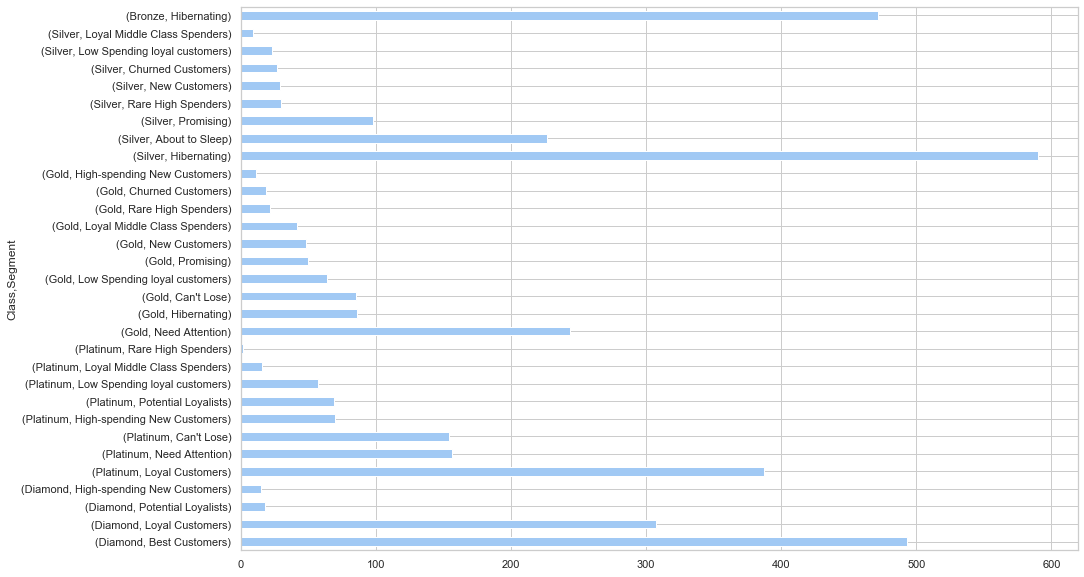

In [37]:
rfm_uk.groupby('Class').Segment.value_counts().plot(kind='barh', figsize=(15,10))
plt.savefig('Class_Segment_Distribution.png', bbox_inches='tight')
plt.show()

In [38]:
rfm_uk.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,Scores,Class,RFMScores,Segment
0,12346.0,326,1,77183.60,5,5,1,11,Silver,551,Rare High Spenders
1,12747.0,3,103,4196.01,1,2,1,4,Diamond,121,Best Customers
2,12748.0,1,4595,33719.73,1,1,1,3,Diamond,111,Best Customers
3,12749.0,4,199,4090.88,1,1,1,3,Diamond,111,Best Customers
4,12820.0,4,59,942.34,1,2,2,5,Diamond,122,Best Customers


# Others Country

In [39]:
df_other['InvoiceDate'].sort_values(ascending=False).head()

541908   2017-12-07
540450   2017-12-07
540359   2017-12-07
540358   2017-12-07
540357   2017-12-07
Name: InvoiceDate, dtype: datetime64[ns]

In [40]:
latest_date_other=dt.datetime(2017,12,8)
rfm_other=df_other.groupby(df_other['CustomerID']).agg({'InvoiceDate': lambda x:(latest_date_other-x.max()).days, # Recency
                                            'InvoiceNo': lambda x:len(x), # Frequency
                                            'spend': lambda x:x.sum()}).reset_index()# Monetary
rfm_other.head()

,CustomerID,InvoiceDate,InvoiceNo,spend
0,12347.0,3,182,4310.00
1,12348.0,76,31,1797.24
2,12349.0,19,73,1757.55
3,12350.0,311,17,334.40
4,12352.0,37,85,2506.04


In [41]:
# change column name
rfm_other.rename(columns={'InvoiceDate': 'Recency',
                'InvoiceNo': 'Frequency',
                'spend': 'Monetary'}, inplace=True)
rfm_other.head()

,CustomerID,Recency,Frequency,Monetary
0,12347.0,3,182,4310.00
1,12348.0,76,31,1797.24
2,12349.0,19,73,1757.55
3,12350.0,311,17,334.40
4,12352.0,37,85,2506.04


<function matplotlib.pyplot.show(*args, **kw)>

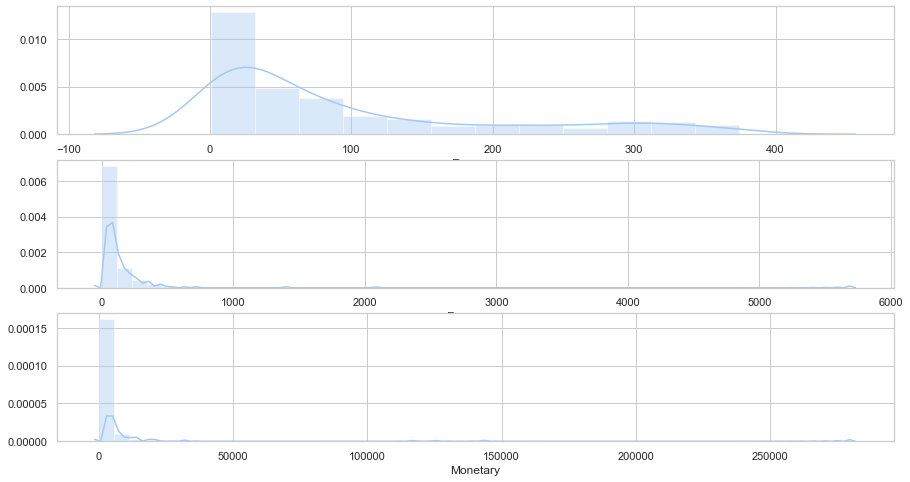

In [42]:
# check skewness from each rfm
fig, ax=plt.subplots(3, figsize=(15,8))
sns.distplot(rfm_other['Recency'], ax=ax[0])
sns.distplot(rfm_other['Frequency'], ax=ax[1])
sns.distplot(rfm_other['Monetary'], ax=ax[2])
plt.show

In [43]:
# divide the category using quantile into 5 category
quantiles_other=rfm_other.quantile(q=[0.20, 0.40, 0.60, 0.80])
quantiles_other=quantiles_other.to_dict()
quantiles_other

{'CustomerID': {0.2: 12449.400000000001,
  0.4: 12557.800000000001,
  0.6: 12653.199999999999,
  0.8: 12762.6},
 'Recency': {0.2: 16.0, 0.4: 33.0, 0.6: 75.0, 0.8: 184.60000000000002},
 'Frequency': {0.2: 18.0,
  0.4: 33.80000000000001,
  0.6: 62.0,
  0.8: 127.20000000000005},
 'Monetary': {0.2: 401.08399999999995,
  0.4: 741.5920000000001,
  0.6: 1395.2319999999997,
  0.8: 3483.1240000000025}}

In [44]:
rfm_other['R']=rfm_other['Recency'].apply(r_score, args=('Recency',quantiles_other,))
rfm_other['F']=rfm_other['Frequency'].apply(fm_score, args=('Frequency',quantiles_other,))
rfm_other['M']=rfm_other['Monetary'].apply(fm_score, args=('Monetary',quantiles_other,))
rfm_other.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M
0,12347.0,3,182,4310.00,1,1,1
1,12348.0,76,31,1797.24,4,4,2
2,12349.0,19,73,1757.55,2,2,2
3,12350.0,311,17,334.40,5,5,5
4,12352.0,37,85,2506.04,3,2,2


In [45]:
rfm_other['Scores']=(rfm_other.R.map(int) + rfm_other.F.map(int) + rfm_other.M.map(int))
rfm_other.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,Scores
0,12347.0,3,182,4310.00,1,1,1,3
1,12348.0,76,31,1797.24,4,4,2,10
2,12349.0,19,73,1757.55,2,2,2,6
3,12350.0,311,17,334.40,5,5,5,15
4,12352.0,37,85,2506.04,3,2,2,7


In [46]:
level_other=pd.qcut(rfm_other['Scores'], q=5, labels=label)
rfm_other['Class']=level_other.values
rfm_other.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,Scores,Class
0,12347.0,3,182,4310.00,1,1,1,3,Diamond
1,12348.0,76,31,1797.24,4,4,2,10,Gold
2,12349.0,19,73,1757.55,2,2,2,6,Platinum
3,12350.0,311,17,334.40,5,5,5,15,Bronze
4,12352.0,37,85,2506.04,3,2,2,7,Platinum


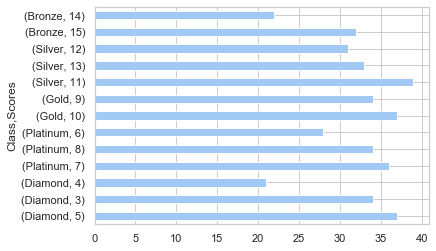

In [47]:
rfm_other.groupby('Class').Scores.value_counts().plot(kind='barh')

In [48]:
rfm_other['RFMScores']=(rfm_other.R.map(str) + rfm_other.F.map(str) + rfm_other.M.map(str))
rfm_other.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,Scores,Class,RFMScores
0,12347.0,3,182,4310.00,1,1,1,3,Diamond,111
1,12348.0,76,31,1797.24,4,4,2,10,Gold,442
2,12349.0,19,73,1757.55,2,2,2,6,Platinum,222
3,12350.0,311,17,334.40,5,5,5,15,Bronze,555
4,12352.0,37,85,2506.04,3,2,2,7,Platinum,322


In [49]:
rfm_other['Segment']=rfm_other['RFMScores'].replace(segment, regex=True)
rfm_other['Segment'].value_counts()

Hibernating                     128
Loyal Customers                  69
Best Customers                   51
Need Attention                   45
Can't Lose                       27
About to Sleep                   25
Potential Loyalists              16
Promising                        15
Low Spending loyal customers     14
New Customers                    11
Loyal Middle Class Spenders       6
Rare High Spenders                6
High-spending New Customers       4
Churned Customers                 1
Name: Segment, dtype: int64

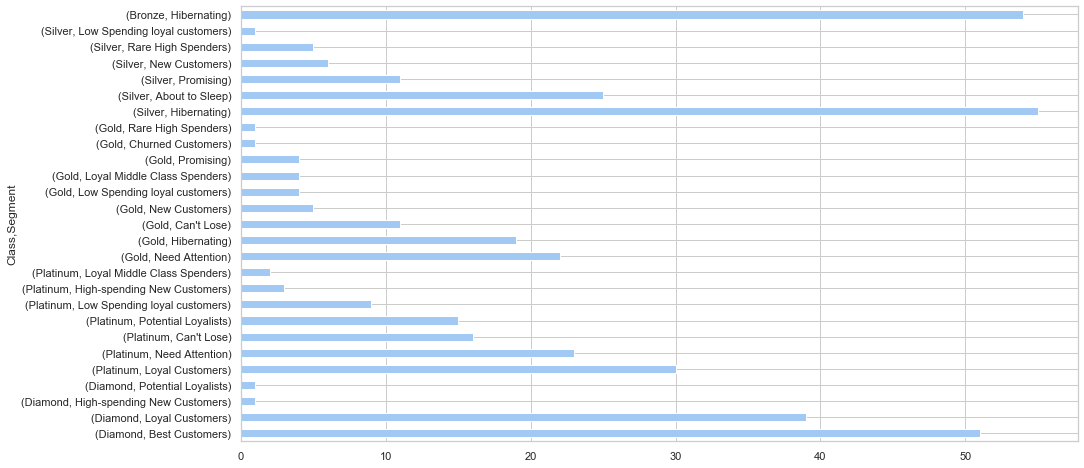

In [50]:
rfm_other.groupby('Class').Segment.value_counts().plot(kind='barh', figsize=(15,8))

In [51]:
rfm_other.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,Scores,Class,RFMScores,Segment
0,12347.0,3,182,4310.00,1,1,1,3,Diamond,111,Best Customers
1,12348.0,76,31,1797.24,4,4,2,10,Gold,442,Need Attention
2,12349.0,19,73,1757.55,2,2,2,6,Platinum,222,Loyal Customers
3,12350.0,311,17,334.40,5,5,5,15,Bronze,555,Hibernating
4,12352.0,37,85,2506.04,3,2,2,7,Platinum,322,Need Attention
